In [4]:
import operator
import math
from gxgp import Node

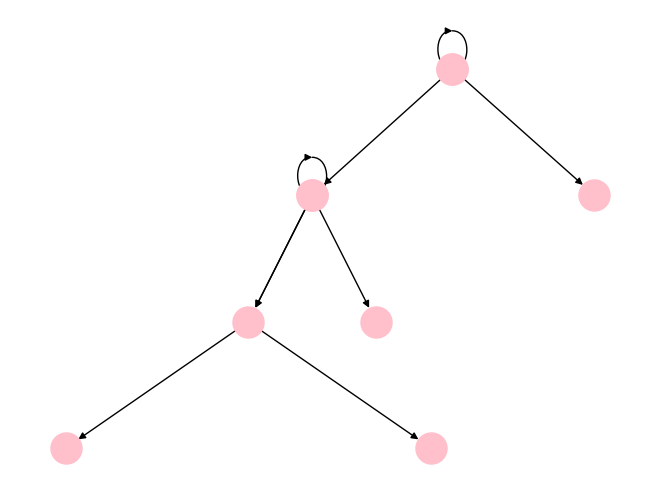

In [5]:
leaf_num = Node(1)
leaf_var = Node('x')
node_op = Node(operator.add, [leaf_num, leaf_var])
node_op = Node(math.sin, [node_op])
f = Node(operator.mul, [node_op, leaf_var])
g = Node(lambda c, x, y: x if c > 0 else y, [f, f, node_op])

In [7]:
str(f), f.long_name

In [6]:
f(x=1)

In [5]:
vars = {'x': 1}
f(**vars)

0.9092974268256817

In [7]:
str(g)


'λ'

In [8]:
sorted([str(x) for x in Node.get_nodes(g)])

['1', 'add', 'mul', 'sin', 'x', 'λ']

In [9]:
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout

In [10]:
G = nx.DiGraph()
for node in Node.get_nodes(g):
    for c in node._children:
        G.add_edge(str(node), str(c))

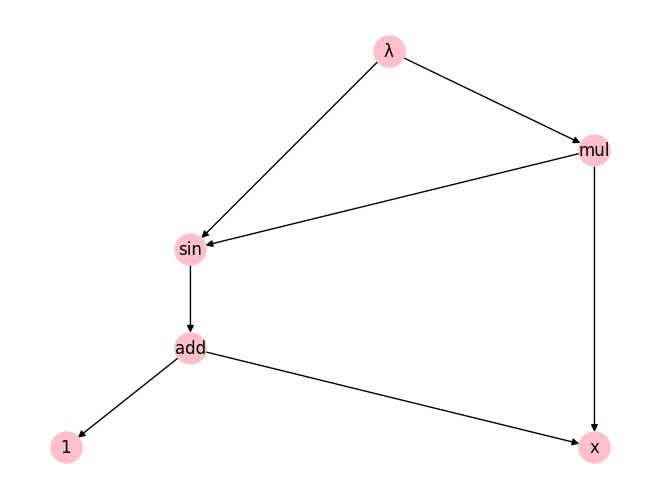

In [15]:
pos = graphviz_layout(G, prog="dot")  # dot neato twopi circo fdp sfdp
nx.draw(
    G,
    pos=pos,
    labels={k: str(k) for k in G},
    node_size=500,
    node_color='pink',
)
#nx.draw_networkx_edge_labels(tree, pos=pos, edge_labels=nx.get_edge_attributes(tree, "label"))